# "Shot" Prompting Techniques using GPT-3.5 and MedMCQA Dataset
* Notebook by Adam Lang
* Date: 3/4/2024
* In this notebook we will explore various prompting techiques using an open source dataset from huggingface and the OpenAI API.

# Prompt Engineering Techniques
* Few shot
* One shot
* Zero shot





### Few Shot Prompting
* Model is given a few examples along with a description task.
* Steps to do this:
    1. Describe task you want the model to complete.
    2. Provide ~3 examples of the input and output.
    3. Prompt the model.

In [1]:
# install openai
!pip install openai==0.28

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 2.3 MB/s eta 0:00:00


In [2]:
# set up openAI key
import openai

openai.api_key = "<YOUR_OPENAI_API_KEY>"

In [113]:
# let's define a function to get response from ChatCompletions API
def get_response(messages, model='gpt-3.5-turbo'):
  response = openai.ChatCompletion.create(
      model=model,
      messages=messages,
      #temperature=0.7,
      #top_p=0.7
  )
  return response.choices[0].message["content"]

# MedMCQA Case Study

* This is an open-source dataset from the huggingface hub.
* MedMCQA is a large-scale, Multiple-Choice Question Answering (MCQA) dataset designed to address real-world medical entrance exam questions.
* MedMCQA has more than 194k high-quality AIIMS & NEET PG entrance exam MCQs covering 2.4k healthcare topics and 21 medical subjects are collected with an average token length of 12.77 and high topical diversity.
* Dataset open-source link: https://huggingface.co/datasets/openlifescienceai/medmcqa?row=12

In [114]:
first_question = '''
Following endaerectomy on the right common carotid, a patient is found to be blind in the right eye.
It is appears that a small thrombus embolized during surgery and lodged in the aery supplying the optic nerve.
Which artery would be blocked?
(A) Central artery of the retina
(B) Infraorbital artery
(C) Lacrimal artery
(D) Nasociliary artery

'''

In [115]:
first_question_answer = 'A'

In [116]:
second_question = '''
All of the following are surgical options for morbid obesity except -
(A) Adjustable gastric banding
(B) Biliopancreatic diversion
(C) Duodenal Switch
(D) Roux en Y Duodenal By pass

'''

In [117]:
second_question_answer = 'D'

In [118]:
third_question = '''
Which vitamin is supplied from only animal source:
(A) Vitamin C
(B) Vitamin B7
(C) Vitamin B12
(D) Vitamin D

'''

In [119]:
third_question_answer = 'C'

In [120]:
fourth_question = '''
The pharmakokinetic change occurring in geriatric patient is due to:
(A) Gastric absorption
(B) Liver metabolism
(C) Renal clearance
(D) Hypersensitivity


'''

### Define the OpenAI System Role

In [121]:
system_role = "You are a helpful assistant that uses medical knowledge to answer multiple choice questions."

### Few Shot Prompting in action
* We will give the system the question-answer examples from above and then leave the 4th question unanswered to prompt the model to answer

In [122]:
user_prompt = f'''Question:{first_question}
Answer:{first_question_answer}

Question:{second_question}
Answer:{second_question_answer}

Question:{third_question}
Answer:{third_question_answer}

Question:{fourth_question}
Answer:
'''

In [123]:
messages = [{'role':'system','content':system_role},
            {'role':'user','content':user_prompt}
            ]

In [124]:
# obtain answer
print(get_response(messages))

(B) Liver metabolism


summary: this is correct according to the training data from the dataset.

### One Shot Prompting
* Model sees just 1 example with task description.
* Steps:
  1. 1 Task description
  2. 1 example
  3. Prompt without completion.

### One-Shot Prompting with the MedMCQA Dataset
* We will use the fourth_question as our model input because it is an example of one shot prompting.

In [125]:
user_prompt = f'''Question:{first_question}
Answer:{first_question_answer}

Question:{fourth_question}
Answer:
'''

In [126]:
messages = [{'role':'system','content':system_role},
            {'role':'user','content':user_prompt}
            ]

In [127]:
# obtain model response
print(get_response(messages))

(B) Liver metabolism


summary:
* 1 shot prompting has its drawbacks as you can see the model answered (B) Liver Metabolism which is not correct.
* Perhaps the 1 example we gave it was not sufficient enough for the model to perform well.

### Zero Shot Prompting
* No examples given!
* Steps:
  1. Give a task description
  2. Give a prompt

* Let's see how this performs on the same dataset and the same question as above. Will it perform better than 1 shot prompting?

In [128]:
user_prompt = f'''Question:{fourth_question}
Answer:
'''

In [129]:
messages=[{'role':'system','content':system_role},
          {'role':'user','content':user_prompt}
          ]

In [130]:
# get model response
print(get_response(messages))

(C) Renal clearance

Pharmacokinetic changes in geriatric patients often involve decreased renal clearance, leading to altered drug metabolism and potential accumulation of medications in the body.


summary:
* Wow! Zero-shot prompting performed better than 1 shot prompting and gave us the correct answer which is (C) Renal clearance.

# Summary
* The original paper found that Random few-shot prompting improved accuracy over Zero-shot prompting.
* One-shot prompting was "in-between" the two.
* Depending upon your use case, few-shot prompting should return better results overall from the LLM as it gives more context to the model.


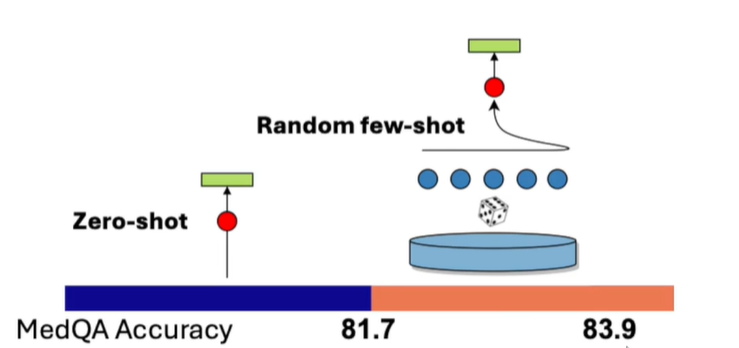